In [14]:
#import libraries
from skimage.filters import threshold_sauvola
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.color import rgb2gray, label2rgb
from skimage.morphology import remove_small_objects
from skimage.filters import gaussian
#from skan.pre import threshold
import numpy as np
import plantcv.plantcv as pcv
#import numba
import os

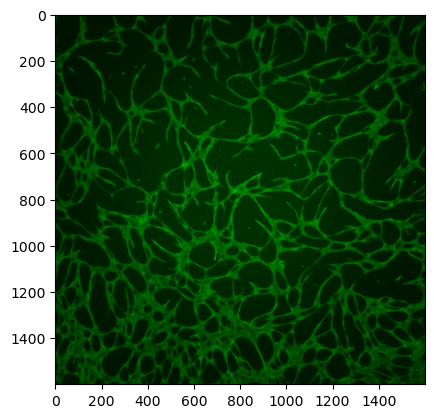

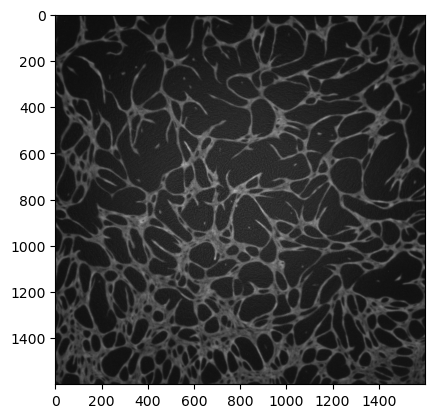

In [16]:
# os.chdir("//shares01.rdm.uq.edu.au/HKUG2023-A10939")
PATH = "F://F2//MyExperiment_Wellc6_F2_000521.tif"
img = io.imread(PATH)
imgGrey = img[:,:,1]
plt.imshow(img)
plt.figure()
plt.imshow(imgGrey, cmap='gray')

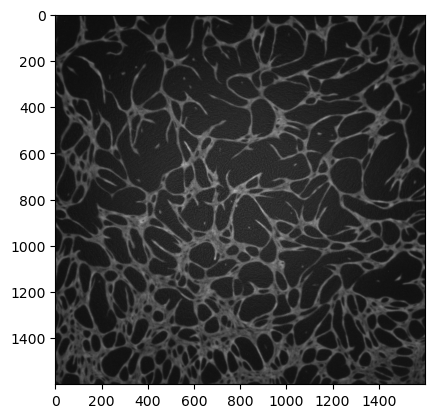

In [17]:
from skimage.exposure import adjust_gamma
adapted_hist = adjust_gamma(imgGrey)
plt.imshow(adapted_hist, cmap = 'gray')

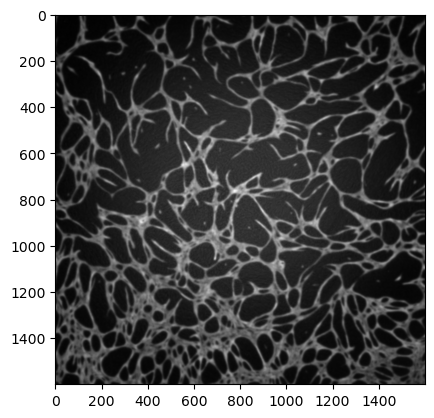

In [18]:
#Apply small gaussian blur
sigma = 2.5
blurred = gaussian(adapted_hist, sigma=(sigma, sigma), truncate=3.5, channel_axis=-1)
plt.figure()
plt.imshow(blurred, cmap = 'gray')

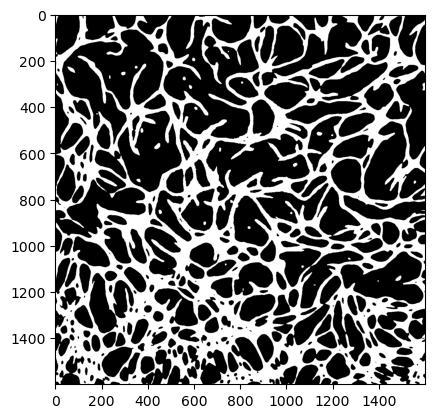

In [19]:
#Let's try some sauvola?
from skimage.filters import threshold_local
from skimage.morphology import disk
from skimage.filters.rank import otsu
import numpy as np

thresh = threshold_local(blurred , block_size = 1501) 
bw = blurred > thresh

plt.imshow(bw, cmap = 'gray')

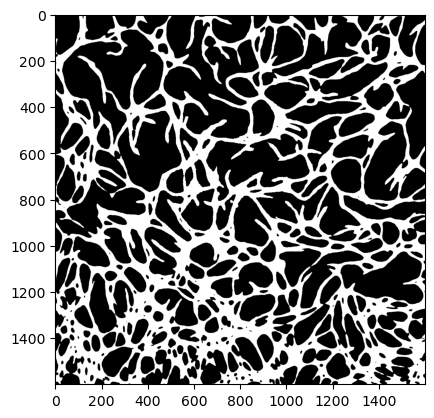

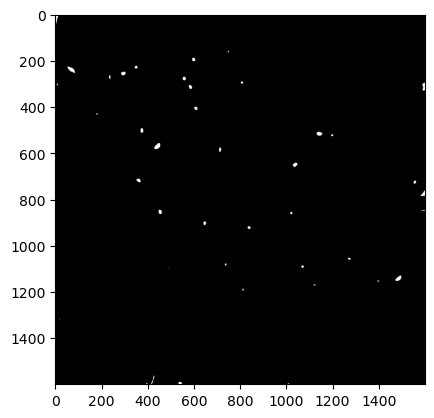

In [20]:
#Get rid of small areas
ensmallend = remove_small_objects(bw, min_size = 1000, connectivity=4)
plt.imshow(ensmallend, cmap = 'gray')
diff = bw ^ ensmallend
plt.figure()
plt.imshow(diff, cmap='gray')

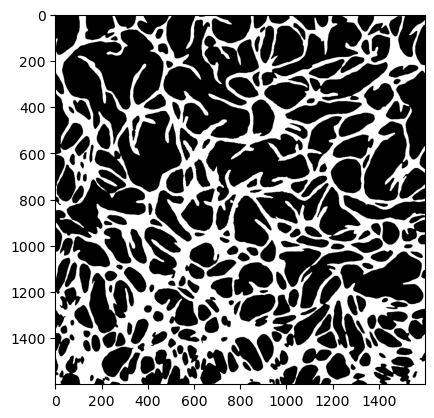

In [21]:
#Close Holes
from skimage.morphology import remove_small_holes, isotropic_dilation
#remove small holes
unholed = remove_small_holes(ensmallend, area_threshold = 300)
plt.imshow(unholed,cmap='gray')

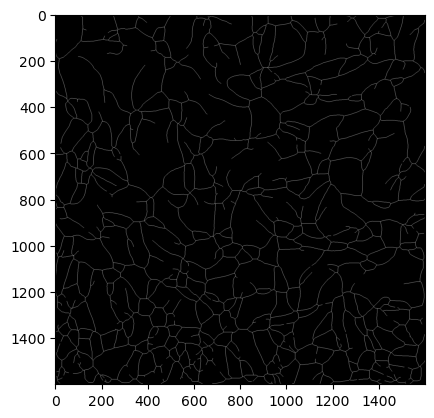

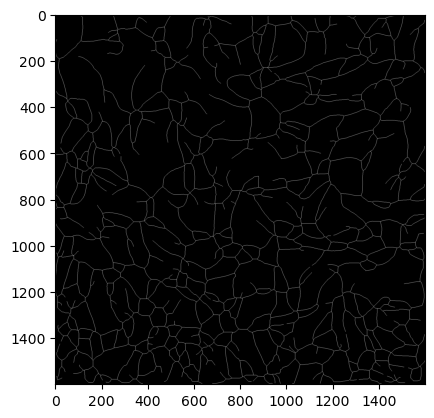

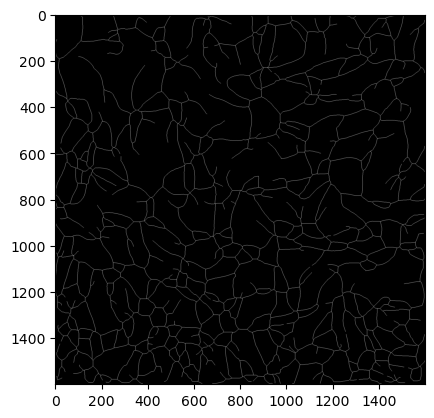

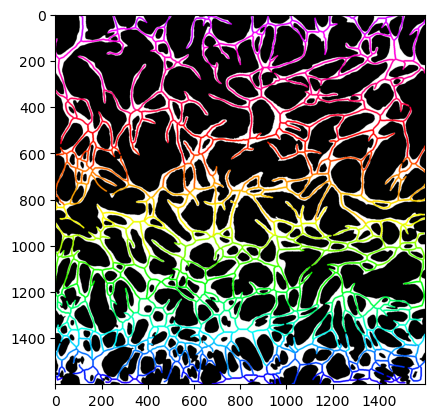

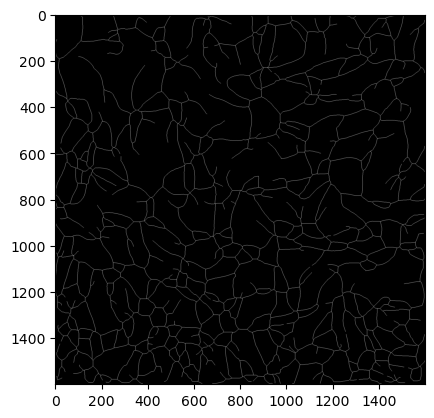

In [27]:
skel = pcv.morphology.skeletonize(unholed)
pruned_skeleton, img, objects = pcv.morphology.prune(skel_img=skel, size=30, mask=unholed.astype(np.uint8)*255)
plt.imshow(pruned_skeleton, cmap='gray')

In [28]:
#import skimage
#skimage.io.imsave("C:\\Users\\harry\\Downloads\\skel.tiff", skel)

In [29]:
# from dsepruning import skel_pruning_DSE
# from scipy.ndimage import distance_transform_edt
# skel_dist = distance_transform_edt(dilated,return_indices=False, return_distances=True)
# plt.imshow(skel_dist)
# # pruned_skel = skel_pruning_DSE(skel,skel_dist,300).astype(np.uint16)
# # plt.figure()
# # plt.imshow(pruned_skel)

In [30]:
# from plantcv import plantcv as pcv
# pcv.params.debug = "plot"


In [31]:
from skan import csr
len_crit = 100
graph_class = csr.Skeleton(skel)
stats = csr.summarize(graph_class, find_main_branch=True)
branches = stats['branch-distance']
# for branch in branches:
#     if branch < len_crit:
#         #Remove Branch


(836, 2)


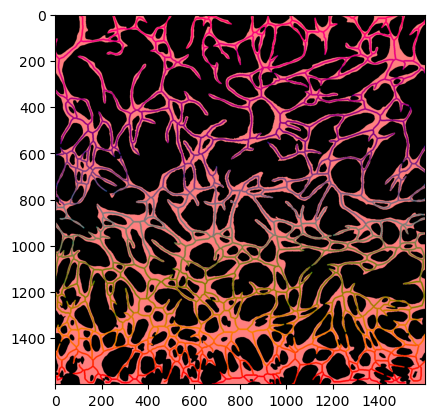

In [42]:
import sknw
from skan import draw
graph = sknw.build_sknw(pruned_skeleton)
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
print(np.shape(ps))

fig, ax = plt.subplots()
masked = label2rgb(unholed,image=img, colors = ['red'], alpha=0.5, saturation = 1)
plt.imshow(masked)
#draw.overlay_skeleton_2d(masked, pruned_skel, dilate=2, axes=ax)
#plt.plot(ps[:,1], ps[:,0], 'b.')

608


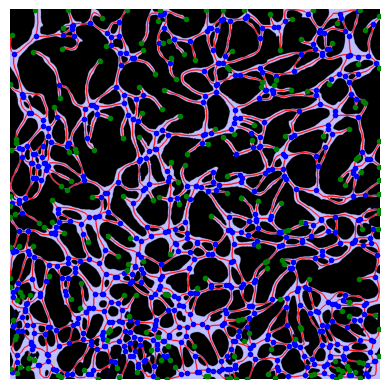

In [33]:
# #try and use network x to differentiate branch pts from end pts
# import networkx as nx
# bp = []
# ep = []
# for node in nodes:
#     if graph.degree[node] == 1:
#         ep.append(node)
#     elif graph.degree[node] > 2:
#         bp.append(node)
# branchPoints = np.array([nodes[i]['o'] for i in bp])
# endPoints = np.array([nodes[i]['o'] for i in ep])

# fig, ax = plt.subplots()
# masked = label2rgb(dilated,image=img, colors = ['blue'], alpha=0.25)
# draw.overlay_skeleton_2d(masked, pruned_skeleton, dilate=2, axes=ax)
# plt.plot(branchPoints[:,1], branchPoints[:,0], 'b.')
# plt.plot(endPoints[:,1], endPoints[:,0], 'g.')
# print(len(branchPoints))

In [34]:
totalLen = 0
print(len(graph.edges()))
for (s,e) in graph.edges():
    ps = graph[s][e]['weight']
    totalLen += ps
print(totalLen)
print(totalLen/len(graph.edges()))
print(graph.edges())

1048
53219.480415492064
50.78194696134739
[(0, 28), (1, 10), (2, 40), (3, 16), (4, 11), (5, 9), (6, 32), (7, 21), (8, 54), (9, 13), (9, 53), (10, 22), (10, 14), (11, 25), (11, 42), (12, 34), (13, 42), (13, 18), (14, 15), (14, 39), (15, 65), (15, 26), (16, 37), (16, 20), (17, 31), (18, 30), (18, 46), (19, 29), (20, 27), (20, 57), (21, 24), (21, 27), (23, 25), (24, 36), (24, 44), (25, 35), (27, 89), (28, 48), (28, 52), (29, 32), (29, 48), (31, 43), (31, 88), (32, 33), (33, 38), (33, 41), (34, 37), (34, 35), (35, 75), (36, 40), (36, 44), (37, 57), (39, 64), (39, 58), (40, 45), (41, 51), (41, 55), (42, 47), (44, 74), (45, 61), (45, 74), (46, 49), (46, 53), (47, 67), (47, 49), (48, 56), (49, 72), (50, 84), (51, 54), (51, 55), (52, 56), (52, 79), (53, 85), (54, 84), (55, 71), (56, 68), (57, 97), (58, 61), (58, 59), (59, 62), (59, 82), (60, 67), (61, 94), (63, 64), (64, 98), (66, 70), (67, 73), (68, 69), (68, 80), (70, 70), (70, 72), (72, 81), (73, 83), (73, 81), (74, 96), (76, 92), (77, 89),

In [51]:
import skan.csr
degree = skan.csr.make_degree_image(pruned_skeleton) 
branches = degree > 2
ends = np.nonzero(degree == 1)
positions = np.nonzero(branches)
print(len(positions[0]))


1828


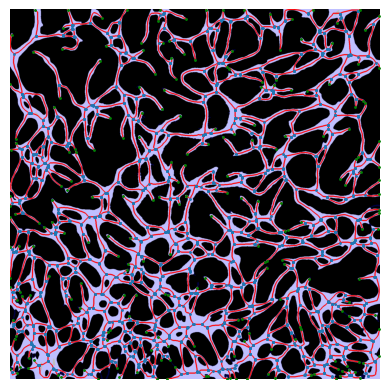

In [46]:
from skan import draw
fig, ax = plt.subplots()
masked = label2rgb(dilated,image=img, colors = ['blue'], alpha=0.25)
draw.overlay_skeleton_2d(masked, pruned_skeleton, dilate=2, axes=ax)
plt.scatter(positions[1], positions[0], s=1)
plt.scatter(ends[1], ends[0], s=1, color = ['green'])
plt.savefig('wow.png', bbox_inches='tight')

In [52]:
# #Set Cluster Distance
# clusterDistance = 100
# #np_pos = np.array(positions)
# np_pos = np.vstack(positions).T
# print(np_pos)
# #Create a tree of points and query points until there are no points within the cluster distance
# from scipy.spatial import KDTree
# tree = KDTree(np_pos, compact_nodes=False, copy_data=True, balanced_tree=True)
# points = list(tree.query_pairs(clusterDistance, p = 2)) #tuple -> immutable
# #traversed = [False for i in range len(points)] #Boolean to denote if traversed
# #Go through each of these cluster points, whittle down and remove them
# # for point in points:
# #     #Find all points close to given point
# print(len(points))
    

[[   5 1505]
 [   5 1506]
 [   5 1507]
 ...
 [1588 1392]
 [1589 1205]
 [1589 1393]]
24322


In [53]:
# touched = [False for i in range(len(points))] #Stores if we've touched a given branch point
# newPoints = []
# for i in range(len(points)):
#     point = points[i]
#     closePoints = tree.query_ball_point(point, clusterDistance)
#     if len(closePoints) > 0 and not touched[i]:
#         #create list of tuples and adjust touched list
#         closePointPositions = [points[j] for j in closePoints if not touched[j]]
#         #Average Positions:
#         x = sum(j[0] for j in closePointPositions)/len(closePoints)
#         y = sum(j[1] for j in closePointPositions)/len(closePoints)
#         #mark all points as touched
#         for point in closePoints: touched[point] = True
#         touched[i] = True
#         #append averaged position to newPoints
#         newPoints.append([x,y])
#     elif not touched[i]:
#         newPoints.append(point)
#         touched[i] = True
# print(np.shape(newPoints))

(23962, 2)


515

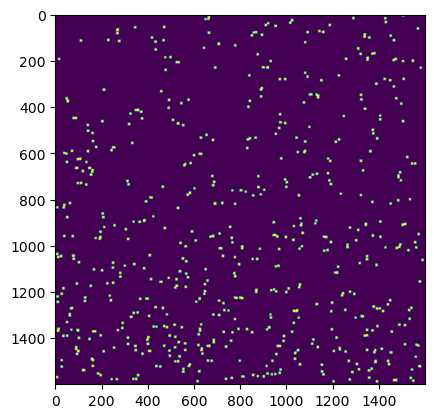

In [59]:
'''Find points using morphological operations.'''
from skimage.morphology import square, binary_dilation
from skimage.measure import regionprops, label
structElem = square(10)
dilatedBranchPoints = binary_dilation(branches, footprint=structElem)
plt.imshow(dilatedBranchPoints)
labelBranchPoints = label(dilatedBranchPoints)
props = regionprops(labelBranchPoints)
len(props)



In [49]:
# Get number of cells
numPoints = len(positions[0])
# Size of image
imgSize = np.size(imgGrey)
# Area of Vessels
vesselArea = np.count_nonzero(dilated)
# Percentage Area
percentArea = vesselArea/imgSize * 100
print(imgSize, vesselArea, percentArea)
vesselLength = np.count_nonzero(pruned_skel)
print(vesselLength)
print(numPoints)
print(np.shape(ends))

2560000 967007 37.7737109375
49231
1828
(2, 224)
